## Project Context
This project is about the importance for credit card companies to spot fake transactions, so customers don't pay for things they didn't buy. The information shared comes from a study of credit card purchases made in September 2013 by people in Europe. Over two days, there were 284,807 transactions, and 492 of these were frauds, which is a very small part of all the transactions (0.172%).

## Data Overview
The data shared only includes numbers that have been changed for privacy reasons, using a method called PCA, except for two details: 'Time' and 'Amount'. 'Time' shows how many seconds passed between each purchase and the first one in the data. 'Amount' is how much the transaction was. These details can help in learning about fraud in a more detailed way. The data also marks each transaction as fraud or not with a 'Class' feature, where 1 means fraud and 0 means no fraud.

## Objective
The goal of the project is to understand complex transaction data and find patterns that show fraud. By applying and comparing a variety of machine learning and deep learning methodologies, we aim to not only detect fraudulent transactions but to open avenues for developing robust, scalable fraud detection systems.

## Acknowledgments
This dataset was put together and examined through a joint effort between Worldline and the Machine Learning Group at ULB (Université Libre de Bruxelles), focusing on digging into large sets of data and spotting fraud. You can find more information about what they're currently working on and their past projects related to this subject at their website http://mlg.ulb.ac.be, and for further details, you can visit the Fraud Detection project's page at https://www.researchgate.net/project/Fraud-detection-5, as well as the DefeatFraud project's webpage.






In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sklearn
print(sklearn.__version__)


1.2.2


In [3]:
path ="/content/drive/MyDrive/Datasets/creditcard_data.csv"
df = pd.read_csv (path,sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Checking data types and missing values
print(df.info())

#Summarizing numerical data
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

In [5]:
#Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
df.isnull().values.any()


False

## EDA - Exploratory Data Analysis

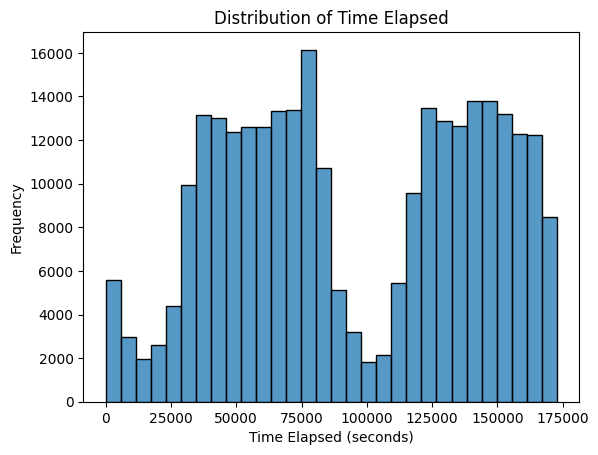

In [7]:
sns.histplot(df.Time, bins=30)
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Elapsed')
plt.show()

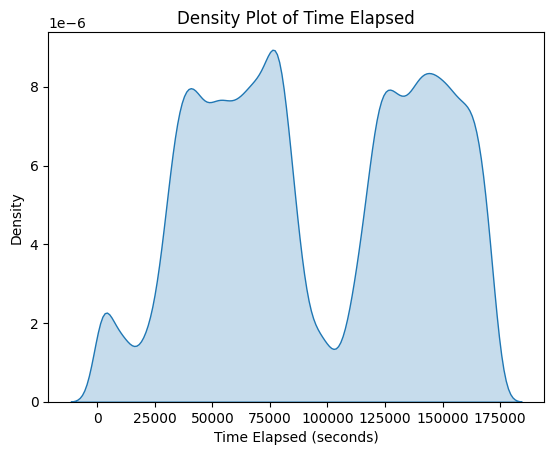

In [8]:
sns.kdeplot(data=df['Time'], fill=True)
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('Density')
plt.title('Density Plot of Time Elapsed')
plt.show()


Text(0.5, 1.0, 'Density Plot of Amount')

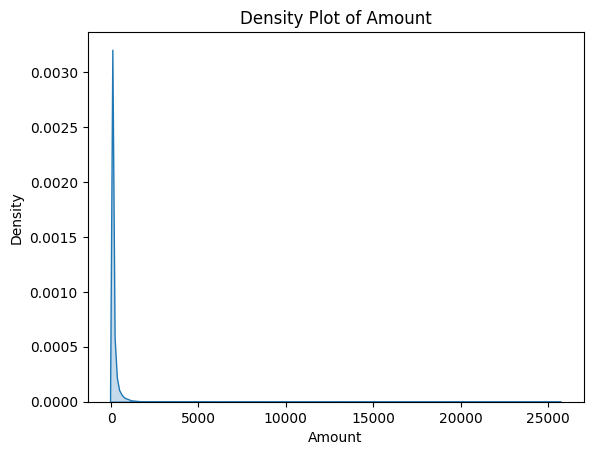

In [9]:
sns.kdeplot(data=df['Amount'], fill=True)
plt.title('Density Plot of Amount')

<Axes: >

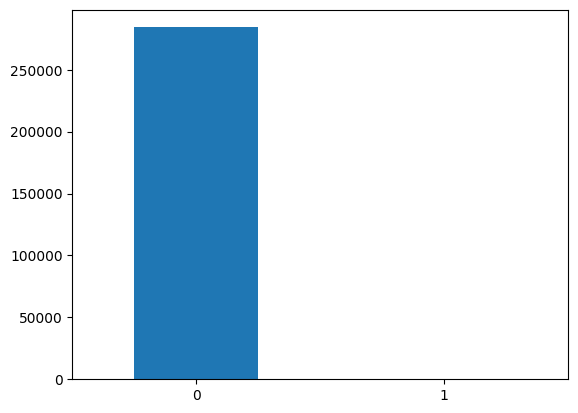

In [10]:
count_classes = pd.value_counts(df['Class'],sort= True)

count_classes.plot(kind = 'bar', rot=0)

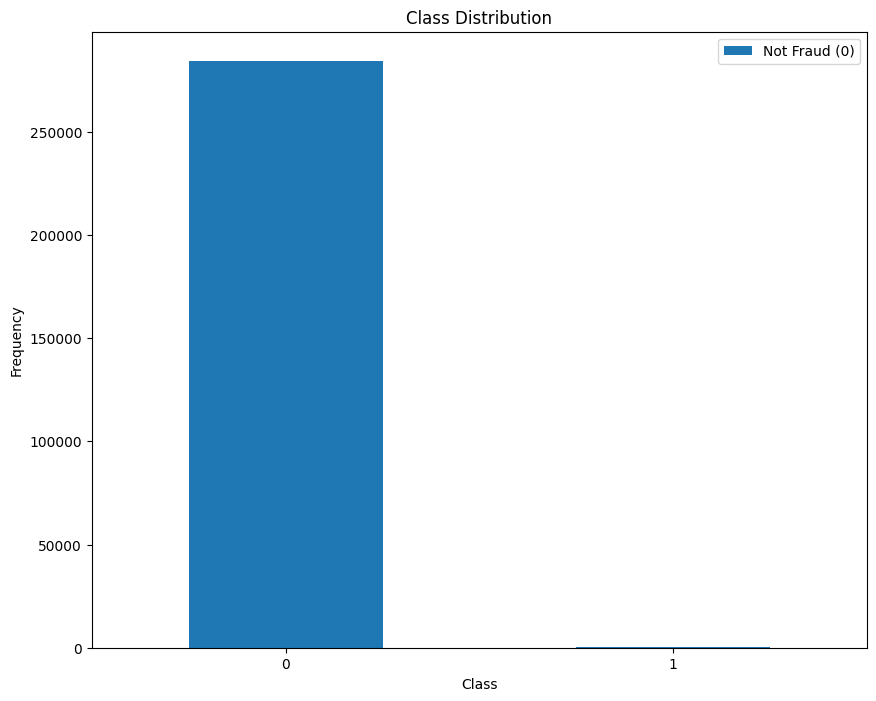

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Class' is the column with fraud labels

# Count the occurrences of each class
count_classes = pd.value_counts(df['Class'], sort=True)

# Define the size of the figure
plt.figure(figsize=(10, 8))  # Adjust the size as needed

# Create the bar plot
count_classes.plot(kind='bar', rot=0)

# Add labels and title
plt.title('Class Distribution')  # Add a title
plt.xlabel('Class')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label

# Add a legend
plt.legend(["Not Fraud (0)", "Fraud (1)"])  # Add a legend to clarify which bar is which

# Show the plot with all the enhancements
plt.show()


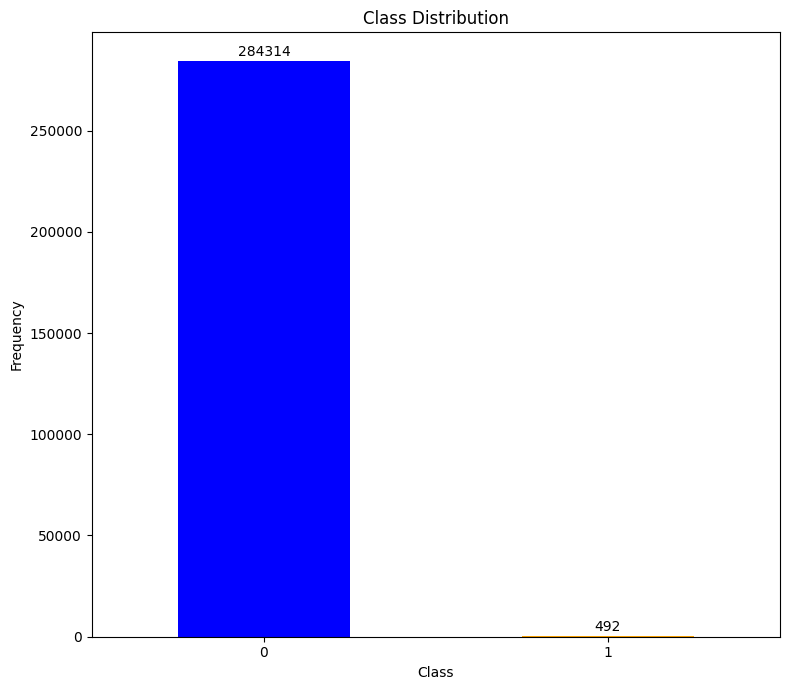

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Class' is the column with fraud labels

# Count the occurrences of each class
count_classes = pd.value_counts(df['Class'], sort=True)

# Define the size of the figure
plt.figure(figsize=(8, 7))  # Adjust the size as needed

# Create the bar plot
ax = count_classes.plot(kind='bar', rot=0, color=['blue', 'orange'])

# Add labels and title
plt.title('Class Distribution')  # Add a title
plt.xlabel('Class')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label

# Annotate the bars with the count
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height()+1000, str(i.get_height()), ha='center', va='bottom')

# Show the plot with all the enhancements
plt.tight_layout()
plt.show()


In [11]:
df_fraud= df[df['Class']==1]
df_normal= df[df['Class']==0]

In [12]:
print(df_fraud.shape,df_normal.shape)

(492, 31) (284314, 31)


In [13]:
df_fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
df_normal.Amount.describe()

count    284314.000000
mean         88.290570
std         250.105416
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<Axes: xlabel='Class', ylabel='Amount'>

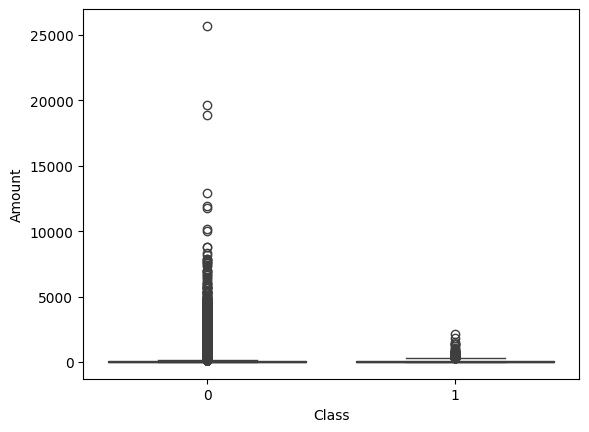

In [15]:
sns.boxplot(x='Class',y='Amount',data=df)

<Axes: xlabel='Class', ylabel='Time'>

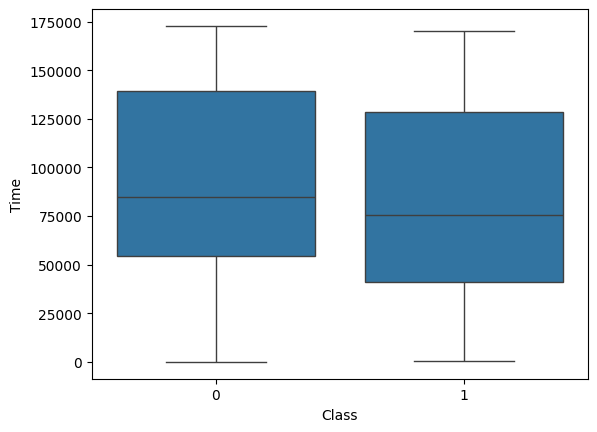

In [16]:
sns.boxplot(x='Class',y='Time',data=df)

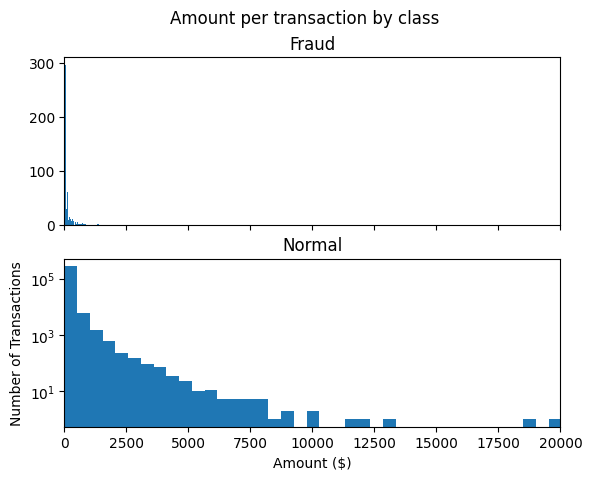

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(df_fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(df_normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [18]:
df.shape

(284806, 31)

In [19]:
df_Fraud = df[df['Class']==1]

df_Valid = df[df['Class']==0]

outlier_fraction = len(df_Fraud)/float(len(df_Valid))

In [20]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(df_Fraud)))

print("Valid Cases : {}".format(len(df_Valid)))

0.0017304810878113635
Fraud Cases : 492
Valid Cases : 284314


In [21]:
df.shape

(284806, 31)

In [22]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284806, 30)
(284806,)


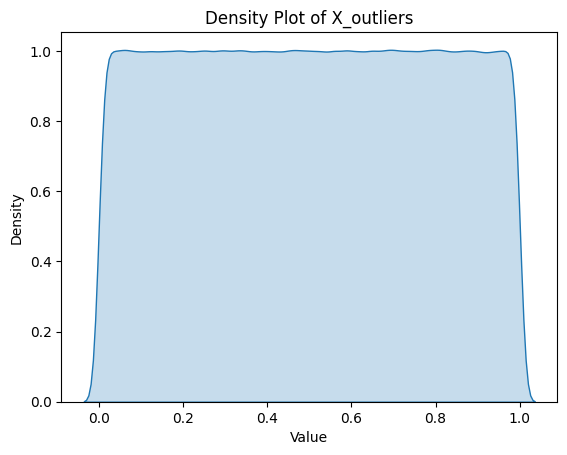

In [23]:
# Assuming X_outliers is flattened or a single column from a DataFrame
sns.kdeplot(X_outliers.flatten(), fill=True)
plt.title('Density Plot of X_outliers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


In [24]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [25]:
##Define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                          max_iter=-1),
    }


In [26]:
type(classifiers)

dict

### Creating a smaller dataset from Original dataset in order to run complex ML models

In [27]:
df_fraction = df.sample(frac = 0.1,random_state=1)

df_fraction.shape

(28481, 31)

In [28]:
df_fraction_Fraud = df_fraction[df_fraction['Class']==1]

df_fraction_Valid = df_fraction[df_fraction['Class']==0]

outlier_fraction = len(df_fraction_Fraud)/float(len(df_fraction_Valid))
print(outlier_fraction)

print("Fraud Cases : {}".format(len(df_fraction_Fraud)))

print("Valid Cases : {}".format(len(df_fraction_Valid)))

0.0016529506928325245
Fraud Cases : 47
Valid Cases : 28434


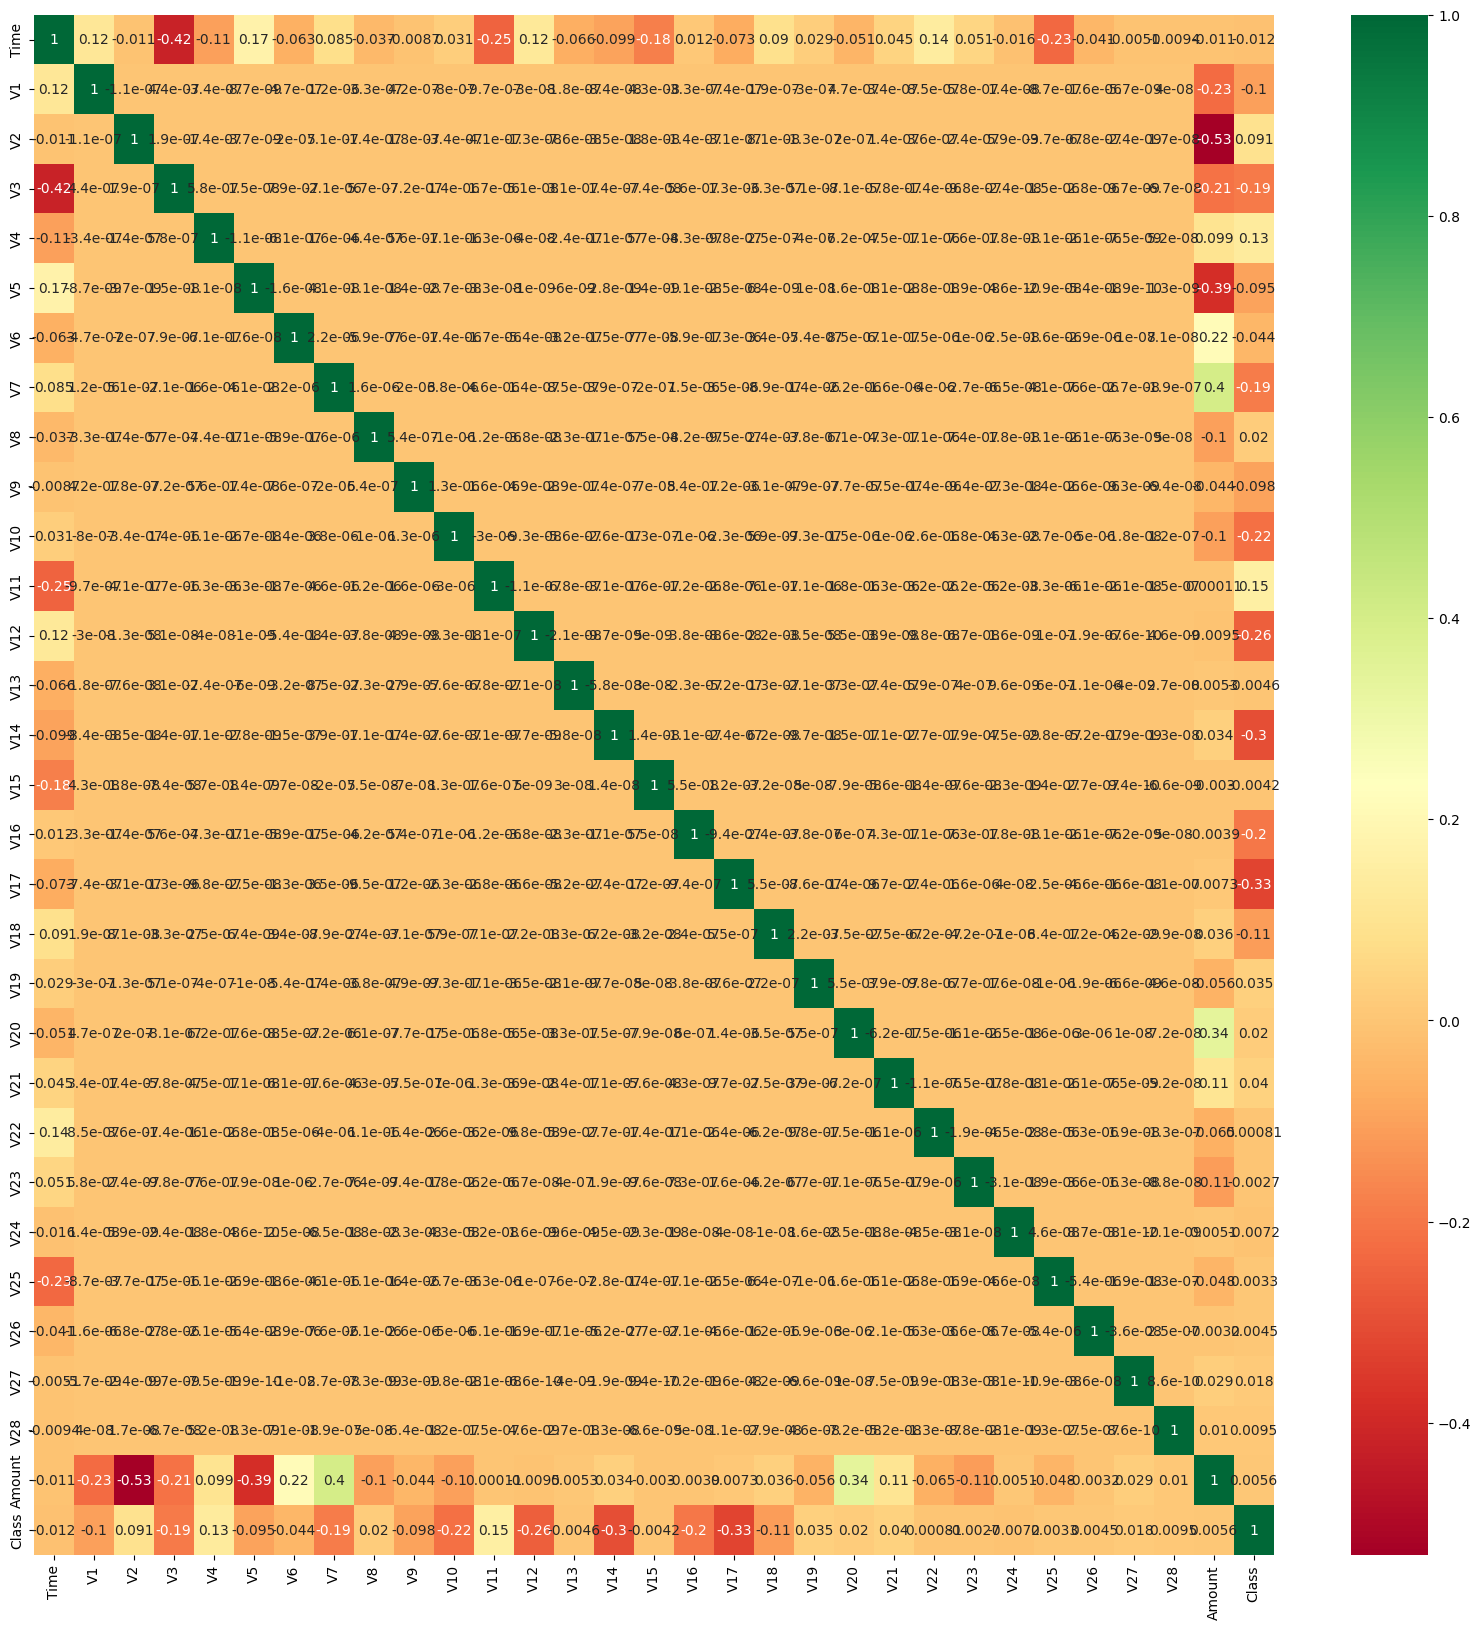

In [29]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_fraction.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
#Create independent and Dependent Features
columns = df_fraction.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = df_fraction[columns]
Y = df_fraction[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [31]:
n_outliers = len(df_fraction_Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_iforest.py:307: UserWarning: max_samples (284806) is greater than the total number of samples (28481). max_samples will be set to n_samples for estimation.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28434
           1       0.24      0.26      0.25        47

    accuracy                           1.00     28481
   macro avg       0.62      0.63      0.62     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 95
Accuracy Score :
0.9966644429619747
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28434
           1       0.02      0.02      0.02        47

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8411
Accuracy Score :
0.7046803131912504
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.71   

In [32]:
print(df_fraction.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


## Extracting Most Imp Features for the Analysis

In [33]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming df_fraction is your DataFrame and it's already preprocessed
X = df_fraction.drop('Class', axis=1)  # Features
Y = df_fraction['Class']  # Target

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, Y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Focus on 'V' columns and sort them
v_feature_importances = feature_importances.filter(like='V').sort_values(ascending=False)

# Print the sorted 'V' feature importances
print(v_feature_importances)


V17    0.143233
V14    0.137609
V12    0.129234
V10    0.077304
V16    0.065622
V11    0.061952
V18    0.031312
V20    0.025332
V9     0.024647
V7     0.023815
V26    0.020197
V1     0.018613
V6     0.018440
V4     0.017554
V3     0.016858
V28    0.016809
V21    0.016571
V5     0.015225
V8     0.015187
V2     0.015063
V23    0.014470
V19    0.013539
V15    0.010991
V27    0.010966
V13    0.010445
V25    0.009440
V24    0.008410
V22    0.008326
dtype: float64


## Applying iForest (Isolation Forest Algorithm) for anomaly detection.

In [34]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Step 2: Prepare your dataset with only the most important features
important_features = ['V17', 'V14', 'V12', 'V10', 'V16']
X_important = X[important_features]
Y = df_fraction['Class']  # Assuming Y is your target variable and already defined

# Split the data into training and testing sets for evaluation purposes
X_train, X_test, Y_train, Y_test = train_test_split(X_important, Y, test_size=0.2, random_state=42)

# Step 3: Apply the Isolation Forest Model
isolation_forest = IsolationForest(n_estimators=100, contamination=outlier_fraction, random_state=42)
isolation_forest.fit(X_train)

# Predict anomalies on the test set
predictions = isolation_forest.predict(X_test)
# Convert predictions to match your target variable encoding if necessary
predictions = np.where(predictions == 1, 0, 1)  # 0 for normal, 1 for anomaly

# Step 4: Evaluate the Model
print("Accuracy Score:")
print(accuracy_score(Y_test, predictions))
print("Classification Report:")
print(classification_report(Y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy Score:
0.9982446901878181
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.30      0.50      0.37         6

    accuracy                           1.00      5697
   macro avg       0.65      0.75      0.69      5697
weighted avg       1.00      1.00      1.00      5697



In [35]:
important_features = ['V17', 'V14', 'V12', 'V10', 'V16', 'Amount', 'Time']
X_important = X[important_features]

# Proceed with the same steps for splitting the data, applying the model, and evaluating it
X_train, X_test, Y_train, Y_test = train_test_split(X_important, Y, test_size=0.2, random_state=42)

isolation_forest = IsolationForest(n_estimators=100, contamination=outlier_fraction, random_state=42)
isolation_forest.fit(X_train)

# Predict and evaluate as before
predictions = isolation_forest.predict(X_test)
predictions = np.where(predictions == 1, 0, 1)  # Adjusting predictions to match target encoding

print("Accuracy Score:")
print(accuracy_score(Y_test, predictions))
print("Classification Report:")
print(classification_report(Y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy Score:
0.9984202211690363
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.33      0.50      0.40         6

    accuracy                           1.00      5697
   macro avg       0.67      0.75      0.70      5697
weighted avg       1.00      1.00      1.00      5697



## Applying K-Means to identify Anomlies

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.spatial.distance import cdist

# Including "Amount" and "Time" with the important "V" features
features = ['V17', 'V14', 'V12', 'V10', 'V16', 'Amount', 'Time']
X_important = df_fraction[features]

# It's often useful to scale the features, especially for algorithms like K-Means that are sensitive to distances
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_important)

# Apply K-Means clustering
n_clusters = 5  # Example cluster number, adjust based on domain knowledge or experimentation
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_scaled)

# Calculate the distance from each point to its nearest cluster center
distances = cdist(X_scaled, kmeans.cluster_centers_, 'euclidean')
min_distances = np.min(distances, axis=1)

# Identify outliers as the points with the top 5% of distances from the nearest cluster center
threshold_distance = np.quantile(min_distances, 0.95)
outliers = min_distances > threshold_distance

# You can now use the 'outliers' boolean array for further analysis or inspection
print(f"Number of identified outliers: {np.sum(outliers)}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of identified outliers: 1424



## Applying Auto-Encoders (Deep learning) for Anomaly detection.

In [37]:
import numpy as np
import tensorflow as tf


In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
# Assuming X is your dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


In [41]:
input_dim = X_train.shape[1]  # Number of features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define encoding and decoding layers
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

# Build the autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Print the autoencoder structure
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 30)                1950      
                                                                 
Total params: 8126 (31.74 KB)
Trainable params: 8126 (31.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose=1)


Epoch 1/100
89/89 [==============================] - 3s 5ms/step - loss: 0.8667 - val_loss: 0.6116
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4812 - val_loss: 0.3343
Epoch 3/100
89/89 [==============================] - 0s 3ms/step - loss: 0.2629 - val_loss: 0.1865
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 0.1483 - val_loss: 0.1047
Epoch 5/100
89/89 [==============================] - 0s 3ms/step - loss: 0.0877 - val_loss: 0.0678
Epoch 6/100
89/89 [==============================] - 0s 3ms/step - loss: 0.0617 - val_loss: 0.0522
Epoch 7/100
89/89 [==============================] - 0s 3ms/step - loss: 0.0481 - val_loss: 0.0391
Epoch 8/100
89/89 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.0303
Epoch 9/100
89/89 [==============================] - 0s 3ms/step - loss: 0.0310 - val_loss: 0.0267
Epoch 10/100
89/89 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.0219
Epoch 11/

In [43]:
# Use the autoencoder to reconstruct the test set
X_test_pred = autoencoder.predict(X_test)

# Calculate the reconstruction error as the mean squared error
reconstruction_error = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Define a threshold for anomaly detection
threshold = np.quantile(reconstruction_error, 0.95)  # Adjust based on your needs

# Anything above the threshold is considered an anomaly
anomalies = reconstruction_error > threshold

print(f"Detected {np.sum(anomalies)} anomalies out of {len(X_test)} samples in the test set.")


179/179 [==============================] - 0s 1ms/step
Detected 285 anomalies out of 5697 samples in the test set.


In [44]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Assuming `reconstruction_error` contains the reconstruction errors of your test samples
# And assuming `Y_test` contains your true labels (0 for normal, 1 for anomaly)

# Determine the threshold (for demonstration, using the 95th percentile)
threshold = np.quantile(reconstruction_error, 0.95)

# Classify as anomalies (1) those above the threshold, normal (0) below
predicted_labels = np.where(reconstruction_error > threshold, 1, 0)

# Calculate the metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predicted_labels, average='binary')
accuracy = accuracy_score(Y_test, predicted_labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"Accuracy: {accuracy}")


Precision: 0.010526315789473684
Recall: 0.5
F1-Score: 0.020618556701030927
Accuracy: 0.9499736703528173


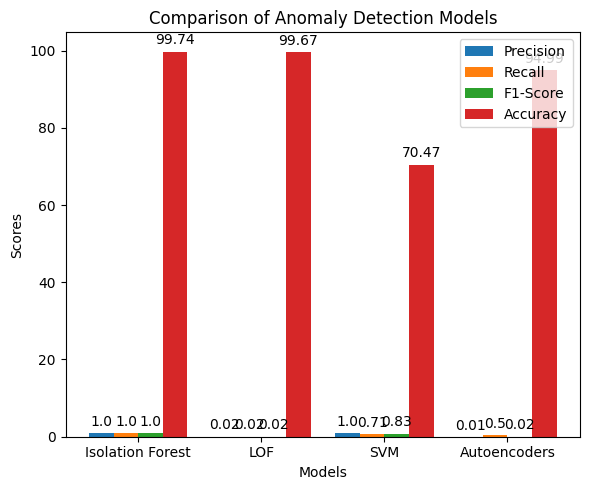

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data for the four models
precision = [1.00, 0.02, 1.00, 0.010526]
recall = [1.00, 0.02, 0.71, 0.5]
f1_score = [1.00, 0.02, 0.83, 0.020619]
accuracy = [99.74, 99.67, 70.47, 94.99]

# X-axis labels
models = ['Isolation Forest', 'LOF', 'SVM', 'Autoencoders']

# Define the x locations for the groups
x = np.arange(len(models))

# Width of the bars
bar_width = 0.2

# Plotting
fig, ax = plt.subplots(figsize=(6, 5))

# Define bars
rects1 = ax.bar(x - bar_width * 1.5, precision, bar_width, label='Precision')
rects2 = ax.bar(x - bar_width / 2, recall, bar_width, label='Recall')
rects3 = ax.bar(x + bar_width / 2, f1_score, bar_width, label='F1-Score')
rects4 = ax.bar(x + bar_width * 1.5, accuracy, bar_width, label='Accuracy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Anomaly Detection Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Attach labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Show the plot
plt.tight_layout()
plt.show()
